In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
import os
import glob

In [2]:
epochs = 5000
minlam = 1
maxlam = 1000

In [3]:
files = glob.glob("img/cr-" + str(epochs) + "-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-*-0.0001-ista-preds.csv")

In [4]:
des = []
for file in files:
    if float(file.split('-')[5]) >= minlam and float(file.split('-')[5]) <= maxlam:
        des.append(file)

In [5]:
len(des)

20

In [6]:
df = pd.read_csv(des[0], index_col = 0)

In [7]:
truths = df['y_true'].tolist()

In [8]:
truths

[0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [9]:
portions = [0] * 10000

In [10]:
for file in des:
    df = pd.read_csv(file, index_col = 0)
    portions = [sum(x) for x in zip(portions, (df['y_probas'] > 1e-8).tolist())]

In [11]:
portions

[0,
 12,
 11,
 7,
 19,
 8,
 15,
 12,
 16,
 8,
 10,
 11,
 10,
 6,
 11,
 6,
 11,
 10,
 14,
 13,
 11,
 11,
 6,
 6,
 11,
 10,
 11,
 5,
 6,
 6,
 13,
 11,
 13,
 11,
 10,
 11,
 13,
 11,
 11,
 11,
 10,
 11,
 7,
 10,
 6,
 11,
 12,
 11,
 10,
 11,
 6,
 9,
 7,
 14,
 8,
 11,
 11,
 6,
 10,
 6,
 11,
 11,
 9,
 11,
 11,
 10,
 10,
 10,
 7,
 6,
 11,
 10,
 11,
 6,
 11,
 7,
 13,
 9,
 11,
 6,
 11,
 11,
 7,
 13,
 11,
 12,
 11,
 10,
 9,
 11,
 11,
 7,
 11,
 14,
 11,
 11,
 10,
 10,
 11,
 11,
 13,
 0,
 11,
 8,
 19,
 8,
 13,
 10,
 15,
 6,
 6,
 12,
 6,
 4,
 7,
 6,
 7,
 7,
 12,
 11,
 7,
 9,
 4,
 5,
 9,
 5,
 6,
 3,
 5,
 3,
 12,
 9,
 12,
 6,
 7,
 7,
 11,
 7,
 7,
 5,
 6,
 7,
 4,
 7,
 5,
 7,
 11,
 7,
 6,
 7,
 4,
 6,
 6,
 9,
 6,
 7,
 11,
 4,
 6,
 4,
 6,
 7,
 6,
 9,
 11,
 7,
 7,
 6,
 5,
 5,
 7,
 6,
 9,
 4,
 9,
 5,
 12,
 9,
 9,
 4,
 8,
 8,
 6,
 12,
 7,
 14,
 8,
 6,
 9,
 7,
 9,
 6,
 6,
 16,
 5,
 6,
 6,
 7,
 6,
 6,
 12,
 13,
 0,
 6,
 19,
 5,
 13,
 12,
 13,
 7,
 9,
 13,
 9,
 5,
 10,
 6,
 11,
 9,
 10,
 10,
 9,
 12,
 7,
 6,
 9

In [12]:
len(portions)

10000

In [13]:
portions = [i/20 for i in portions]

In [14]:
portions

[0.0,
 0.6,
 0.55,
 0.35,
 0.95,
 0.4,
 0.75,
 0.6,
 0.8,
 0.4,
 0.5,
 0.55,
 0.5,
 0.3,
 0.55,
 0.3,
 0.55,
 0.5,
 0.7,
 0.65,
 0.55,
 0.55,
 0.3,
 0.3,
 0.55,
 0.5,
 0.55,
 0.25,
 0.3,
 0.3,
 0.65,
 0.55,
 0.65,
 0.55,
 0.5,
 0.55,
 0.65,
 0.55,
 0.55,
 0.55,
 0.5,
 0.55,
 0.35,
 0.5,
 0.3,
 0.55,
 0.6,
 0.55,
 0.5,
 0.55,
 0.3,
 0.45,
 0.35,
 0.7,
 0.4,
 0.55,
 0.55,
 0.3,
 0.5,
 0.3,
 0.55,
 0.55,
 0.45,
 0.55,
 0.55,
 0.5,
 0.5,
 0.5,
 0.35,
 0.3,
 0.55,
 0.5,
 0.55,
 0.3,
 0.55,
 0.35,
 0.65,
 0.45,
 0.55,
 0.3,
 0.55,
 0.55,
 0.35,
 0.65,
 0.55,
 0.6,
 0.55,
 0.5,
 0.45,
 0.55,
 0.55,
 0.35,
 0.55,
 0.7,
 0.55,
 0.55,
 0.5,
 0.5,
 0.55,
 0.55,
 0.65,
 0.0,
 0.55,
 0.4,
 0.95,
 0.4,
 0.65,
 0.5,
 0.75,
 0.3,
 0.3,
 0.6,
 0.3,
 0.2,
 0.35,
 0.3,
 0.35,
 0.35,
 0.6,
 0.55,
 0.35,
 0.45,
 0.2,
 0.25,
 0.45,
 0.25,
 0.3,
 0.15,
 0.25,
 0.15,
 0.6,
 0.45,
 0.6,
 0.3,
 0.35,
 0.35,
 0.55,
 0.35,
 0.35,
 0.25,
 0.3,
 0.35,
 0.2,
 0.35,
 0.25,
 0.35,
 0.55,
 0.35,
 0.3,
 0.35,
 0.2,
 0.3

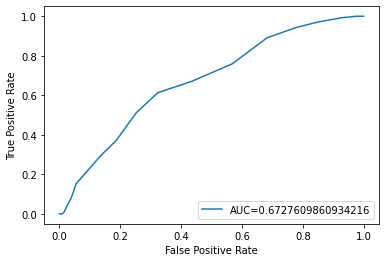

In [15]:
fpr, tpr, _ = metrics.roc_curve(truths,  portions)
auc = metrics.roc_auc_score(truths, portions)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [16]:
des

['img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-1.0-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-37.92690190732246-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-54.555947811685144-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-18.32980710832434-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-26.366508987303554-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-78.47599703514607-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-12.742749857031322-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-112.88378916846884-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-162.3776739188721-0.0001-ista-preds.csv',
 'img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-233.57214690901213-0.0001-ista-preds.csv',
 'img/cr-

In [37]:
d1 = pd.read_csv('img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-1.0-0.0001-ista-preds.csv')

In [38]:
d2 = pd.read_csv('img/cr-5000-De-noised_100G_6T_300cPerT_dynamics_7_DS6-H-1.438449888287663-0.0001-ista-preds.csv')

In [39]:
d1 = d1['y_probas']

In [40]:
d2 = d2['y_probas']

In [41]:
d1

0       0.000000
1       0.095583
2       0.119916
3       0.009741
4       0.601166
          ...   
9995    0.015709
9996    0.037876
9997    0.087607
9998    0.008604
9999    0.000000
Name: y_probas, Length: 10000, dtype: float64

In [42]:
d2

0       0.000000
1       0.011837
2       0.007678
3       0.000063
4       0.636941
          ...   
9995    0.002245
9996    0.002388
9997    0.061785
9998    0.001476
9999    0.000000
Name: y_probas, Length: 10000, dtype: float64

In [44]:
c = 0
for i in range(10000):
    if d2[i] < d1[i]:
        c = c + 1
print(c)

8073
